In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt, lfilter
from scipy.interpolate import interp1d

In [2]:
def detrend_signal(arr, win_size):
    if not isinstance(win_size, int):
        win_size = int(win_size)
    length = len(arr)
    norm = np.convolve(np.ones(length), np.ones(win_size), mode='same')
    mean = np.convolve(arr, np.ones(win_size), mode='same') / norm
    return (arr - mean) / mean

### 데이터 불러오기

In [3]:
# 읽어올 엑셀 파일 지정
filename = 'train8.xlsx'

# 엑셀 파일 읽어 오기
data = pd.read_excel(filename, engine='openpyxl')

### 라벨 따로떼기

In [4]:
ID  = data.iloc[-1]
data.drop(data.tail(1).index,inplace=True)

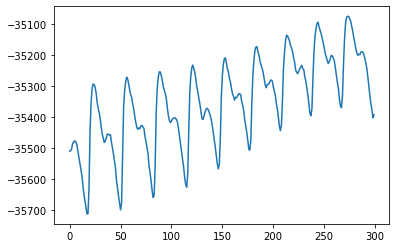

In [5]:
#라벨 잘 빠졌는지 확인
plt.plot(data[1] * -1)

### 데이터 전처리

In [20]:
#디트렌딩
det = detrend_signal(data[1], 50) * -1
ppg = list(det)

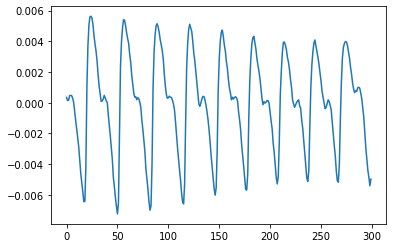

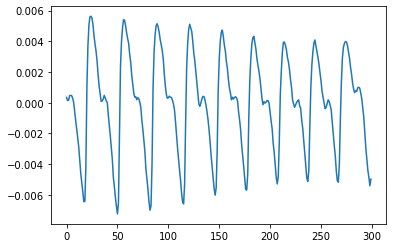

In [21]:
#원본 신호와와 디트렌딩 비교

plt.plot(det)
plt.show()
plt.plot(ppg)

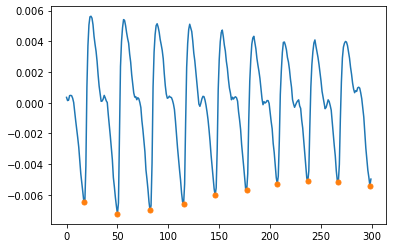

In [22]:
#S-peak 찾기

point_c = scipy.signal.find_peaks(det * -1, height = 0, distance = 30 ) #데이터에 따른 파라미터 값 조정

#그래프 확인
plt.plot(det)
plt.plot(point_c[0], det[point_c[0]], 'o', ms=5)

In [10]:
#단일주기 신호로 추출

for i in range(5):
     locals()['peak{}'.format(i)] = det[point_c[0][i]:point_c[0][i+1]]

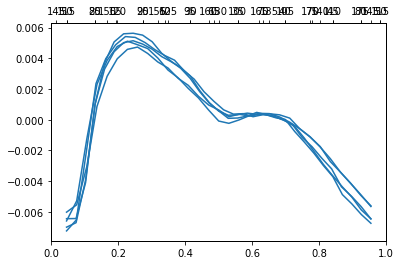

In [11]:
#추출한 단일주기 신호 겹쳐서 그리기

fig, ax1 = plt.subplots()
for i in range(5):
    ax1.twiny()
    plt.plot(locals()['peak{}'.format(i)])


In [12]:
#x축 50으로 보간

for i in range(5):
    x_len= len(locals()['peak{}'.format(i)])
    x = np.linspace(0, 49, x_len)
    
    fq = interp1d(x,locals()['peak{}'.format(i)],kind = 'quadratic')
    xint = np.linspace(x.min(), x.max(), 50)
    
    locals()['peak_inter{}'.format(i)] = fq(xint)

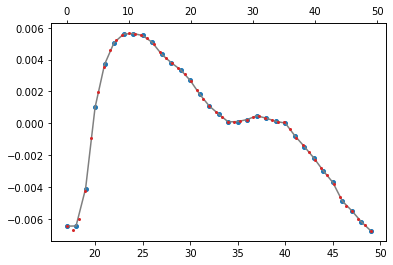

In [24]:
#보간한 점 확인

fig, ax1 = plt.subplots()

ax1.twiny()
ax1.plot(peak0 ,'o', ms=4,color = "tab:blue") # 원본
ax1.plot(peak0, color = "tab:gray") #신호 선 그래프
plt.plot(peak_inter0, 'o', ms=2,color = "tab:red") #보간한 점

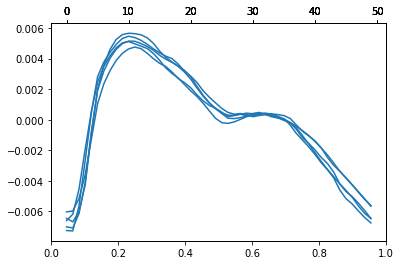

In [16]:
#보간한 피크 겹쳐 그리기

fig, ax1 = plt.subplots()

for i in range(5):
    ax1.twiny()
    plt.plot(locals()['peak_inter{}'.format(i)])

In [17]:
#신호 평균 값 구하기

sigsig = []
for i in range(0,4):
    sigsig.append(locals()['peak_inter{}'.format(i)])
    
sigsum = np.mean(sigsig,axis=0)

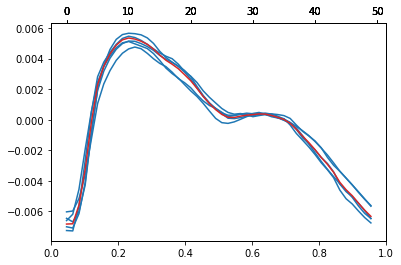

In [18]:
#겹친 신호랑 신호 평균 값 같이 그리기

fig, ax1 = plt.subplots()

for i in range(5):
    ax1.twiny()
    plt.plot(locals()['peak_inter{}'.format(i)])

plt.plot(sigsum,color = "tab:red")

### csv 파일로 저장하기

In [19]:
# import csv

# f = open('test.csv', 'a', newline='')
# wr = csv.writer(f)
# wr.writerow(sigsum)
# f.close()